<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2020/blob/master/day-02/MLDM_2020_seminar02_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1 (3 points)

Consider the following toy dataset:

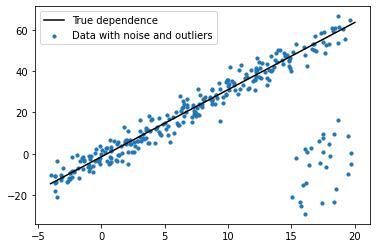

In [2]:
true_function = lambda x: 3.25 * x - 1.47
noize_function = lambda x: (
    np.random.normal(size=len(x)) * 4. +
    np.where(
        x < 15,
        0.,
        -60 + np.random.normal(size=len(x)) * 10
    ) * (np.random.uniform(size=len(x)) < 0.4).astype(int)
)
limits = (-4., 20.)

def generate_dataset(N=300):
  x = np.random.uniform(*limits, size=N)
  y = true_function(x) + noize_function(x)

  return x[:,None], y

X, y = generate_dataset()

x = np.linspace(*limits, 101)
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend();

Implement a linear model $\hat y(x|w) = w_1\cdot x + w_0$ with MAE loss:
$$\text{MAE}(w) = \frac{1}{N}\sum_{i=1}^N\left|y_i - \hat y(x_i|w)\right|,$$
using gradient descent optimization in `numpy`.

*Hint: introduce a constant feature to account for the bias term to make the formulas simpler.*

Plot the learning curve and the final fit. Also, fit the same data with `sklearn`'s `LinearRegression`, and compare the two fits on the same plot. What do you observe? Write a short comment.


model (w0, w1)
 [1.97963165 2.03350823] 


sklearn model (intercept, coefficient)
 (2.0022409716193685, 2.031831348652102) 



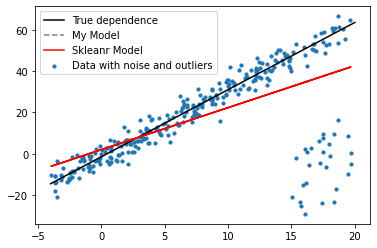

In [3]:
# Code for my Linear Regression Model

def add_bais_term(x):
    return np.c_[np.ones(len(x)),x]

def mae_cost_func(y_hat, y):
#     return np.sqrt(np.mean((y_hat - y)**2))
    return np.mean(np.absolute(y - y_hat))


def predict(x, model):
    return np.matmul(x, model)


def gradient_of_cost(x, y, model):
    preds = predict(x, model)
    error_term = preds - y
    xt_dot_error_term = np.matmul(x.T, error_term) / len(x)
    return xt_dot_error_term


def find_linear_regression_model(x, y):
    n_epochs = 10000
    neta = 0.001
    
    # Initialize all parameters(wj's) to zero
    model = np.zeros(len(x[0]))
    # do n_epochs iteration
    for _ in range(n_epochs):
        grad = gradient_of_cost(x,y,model)
        
        # move parameters closer to optimum solution in every step 
        next_model = model - neta * grad
        model = next_model
    return model


x_bais = add_bais_term(X)
model = find_linear_regression_model(x_bais, y)
print("\nmodel (w0, w1)\n", model, "\n")


# Code for Sklearn Model

from sklearn.linear_model import LinearRegression


sklearn_model = LinearRegression()
sklearn_model.fit(X, y)

print("\nsklearn model (intercept, coefficient)\n", (sklearn_model.intercept_ , sklearn_model.coef_[0]), "\n")


# Code for plotting all results on graph

# Plot of true function
x = np.linspace(*limits, 101)
plt.plot(x, true_function(x), c='black', label='True dependence')

# Plot of My Model
y_vals = model[0] + model[1] * X
plt.plot(X, y_vals, '--', c='gray', label='My Model')

# Plot of Sklearn Model
y_sklean_values = sklearn_model.intercept_ + sklearn_model.coef_[0] * X
plt.plot(X, y_sklean_values, c='red', label='Skleanr Model')

plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend();

I implemented gradient descent and It seems like my models solution is very close to the solution provided by scikit-learn.
My initial thoughts were that, since MAE is not as sensitive to outliers My Model tilts towrds the outliers more than the true_function but not as much as one would expect.
But I realised that thinking was flawed after experimenting with RMSE which is more sensitive to outliers.
I got the same results which implies that gradient descent makes all the difference, perhaps this could also be due to the limited dataset or as the name implies toy-dataset.

## Task 2 (2 points + 1 bonus point + 1 super-bonus point)

(Titanic data again)

Build a model with `sklearn`'s `LogisticRegression` to get the accuracy of at least 0.80 (0.82 for the bonus point, 0.85 for the super-bonus point) on the test set.

Some (optional) suggestions:
- Add new features (e.g. missing value indicator columns)
- Fill missing values
- Encode categorical features (e.g. one-hot encoding)
- Scale the features (e.g. with standard or robust scaler)
- Think of other ways of preprocessing the features (e.g. `Fare` $\to$ `log(Fare)`)
- Try adding polynomial features



In [4]:
# !wget https://github.com/HSE-LAMBDA/MLDM-2020/raw/master/day-01/train.csv 

In [5]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def feature_selection_and_preprocessing(dataset):
  # <YOUR CODE>
  # E.g.:
    features = dataset[["Fare", "SibSp", "Parch", "Sex", "Pclass"]].copy()
    features["Age"] = dataset.Age.fillna(dataset.Age.median())

    features['Embarked'] = data.Embarked.fillna('unknown')
    features['TravelAlone'] = np.where((features["SibSp"] + features["Parch"]) >0, 0, 1)
    features['IsMinor'] = np.where(features['Age']<=16, 1, 0)
    
    return features

model = make_pipeline(
    # <YOUR CODE>
    # E.g.
    make_column_transformer(
        (OneHotEncoder(sparse=False), ['Embarked']),
        (OneHotEncoder(sparse=False), ['Sex']),
        (OneHotEncoder(sparse=True), ['Pclass']),
        (PolynomialFeatures(), ["Age", "SibSp", "Parch"]),
        remainder='passthrough'
    ),
    LogisticRegression(max_iter=1000,solver='liblinear')
)


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train, data_test = train_test_split(data, test_size=200, random_state=42)

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

train_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    )
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)

print("Train accuracy:", accuracy_score(
    data_train['Survived'],
    train_predictions
))
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Train accuracy: 0.8118668596237337
Test accuracy: 0.82
